# Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import SelectKBest, f_classif
import os
import joblib

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
%reload_ext autoreload

### Dataset Loading and Dataset First View

In [ ]:
# load in data
df = pd.read_csv(("CVD_Cleaned.csv"))  
display(df.head())

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### Dataset Rows & Columns count

In [7]:
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  308854
Number of columns are:  19


### Dataset Information

In [8]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

### Duplicate Values

In [17]:
# Checking Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(80)

#### **Conclusão**
De acordo, com "np.int64(80)", o DataFrame df contém 80 duplicatas (linhas idênticas).
O valor 80 significa que existem 80 linhas duplicadas no dataset.


### Missing Values/Null Values

In [18]:
# Checking missing values/null values count for each column
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

#### Attribute information:
- General Health: Would you say that in general your health is . . . <br>
- Exercise: During the past month, other than your regular job, did you participate in any physical activities or exercises such as - running, calisthenics, golf, gardening, or walking for exercise?<br>
- Heart Disease: Respondents that reported having coronary heart disease or mycardialinfarction. <br>
- Skin Cancer: Respondents that reported having skin cancer. <br>
- Other Cancer: Respondents that reported having any other types of cancer. <br>
- Depression: Respondents that reported having a depressive disorder (including depression, major depression, dysthymia, or minor depression). <br>
- Diabetes: Respondents that reported having a diabetes. If yes, what type of diabetes it is/was. <br>
- Arthritis: Respondents that reported having an Arthritis. Sex Respondent’ sex. <br>
- Age Category: Respondent’ age category. <br>
- Height: Respondent’ height in cm. <br>

In [23]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
# numerical_features = numerical_features.drop(["Heart_Disease"], axis=1)
numerical_features.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


**numerical_features.describe():**
O método describe() calcula e exibe estatísticas descritivas para as colunas numéricas do DataFrame.<br>
As estatísticas calculadas incluem: <br>
- count: O número de valores não nulos. <br>
- mean: A média dos valores.<br>
- std: O desvio padrão, que mede a dispersão dos dados.<br>
- min: O valor mínimo.<br>
- 25%: O valor do primeiro quartil (25% dos dados são menores que este valor).<br>
- 50%: O valor da mediana (50% dos dados são menores que este valor).<br>
- 75%: O valor do terceiro quartil (75% dos dados são menores que este valor).<br>
- max: O valor máximo.<br>

In [24]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
categorical_features.describe()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,183590


#### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable using a for loop
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in General_Health is 5
No. of unique values in Checkup is 5
No. of unique values in Exercise is 2
No. of unique values in Heart_Disease is 2
No. of unique values in Skin_Cancer is 2
No. of unique values in Other_Cancer is 2
No. of unique values in Depression is 2
No. of unique values in Diabetes is 4
No. of unique values in Arthritis is 2
No. of unique values in Sex is 2
No. of unique values in Age_Category is 13
No. of unique values in Height_(cm) is 99
No. of unique values in Weight_(kg) is 525
No. of unique values in BMI is 3654
No. of unique values in Smoking_History is 2
No. of unique values in Alcohol_Consumption is 31
No. of unique values in Fruit_Consumption is 77
No. of unique values in Green_Vegetables_Consumption is 75
No. of unique values in FriedPotato_Consumption is 69


### Visualizing the Dataset

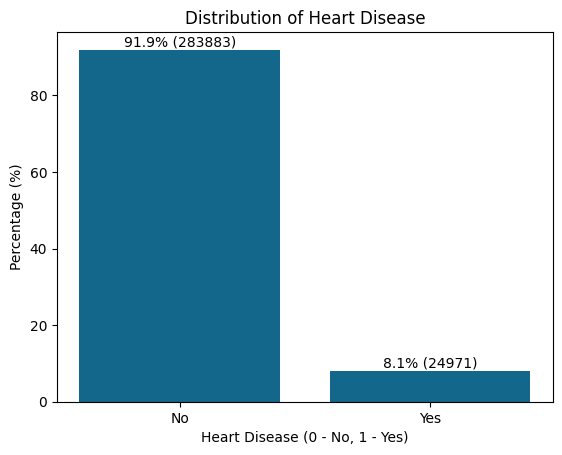

In [49]:
# percentagem de pessoas com heart disease
heart_disease = df['Heart_Disease'].value_counts()
heart_disease_percentage = (heart_disease / heart_disease.sum()) * 100

plt.bar(heart_disease.index, heart_disease_percentage.values, color='#13678A')
plt.xlabel('Heart Disease (0 - No, 1 - Yes)')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Heart Disease')
plt.xticks(heart_disease.index)

for i, (count, percentage) in enumerate(zip(heart_disease.values, heart_disease_percentage.values)):
    plt.text(heart_disease.index[i], percentage, f'{percentage:.1f}% ({count})', 
             ha='center', va='bottom')

plt.show()
